### Machine Learning Model 1 – Decision Tree Regressor suicides/100k pop

Vi starter med at afprøve en **Decision Tree Regressor**, som er en model, der opbygger en række beslutningsregler baseret på værdier i datasættet. Modellen opdeler data i grene og forsøger at minimere fejl ved hver opdeling.

Formålet er at se, om denne model kan fange mønstre i data, som lineær regression ikke har kunnet forklare.

Vi bruger samme features som i vores tidligere model:
- `age_encoded`
- `sex_numeric`
- `gdp_per_capita ($)`

Modellen evalueres med R²-score og Mean Absolute Error (MAE).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    silhouette_score
)

In [2]:
df_no_outliers = pd.read_csv("../cleaned_suicide_data.csv")

🔍 Evaluering af Decision Tree-model på suicides/100k pop:
Mean Squared Error (MSE): 56.88
Mean Absolute Error (MAE): 5.24
R² score: 0.382


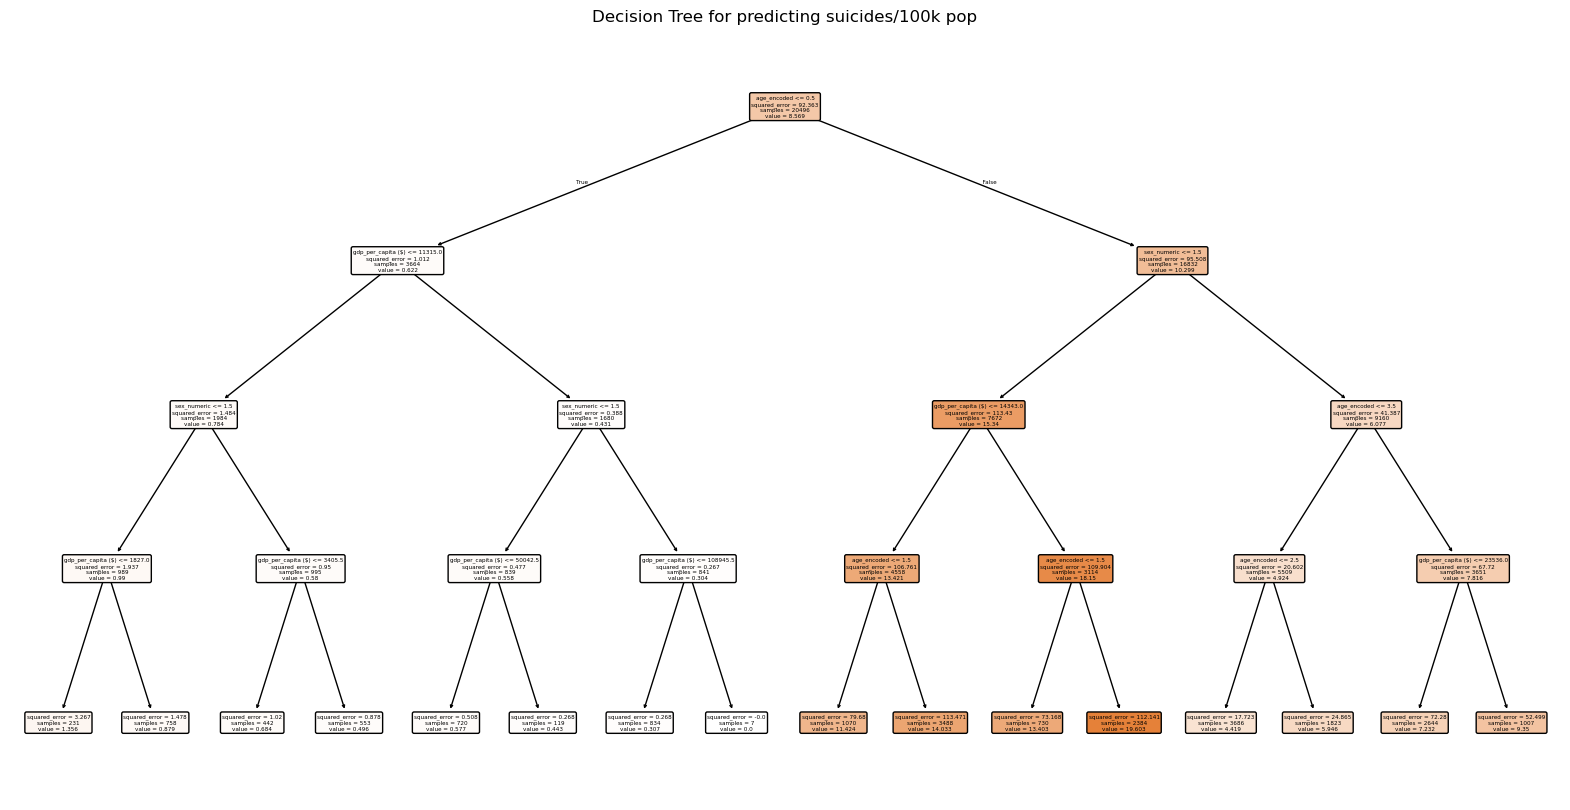

In [3]:
# Vi bruger det rensede datasæt uden outliers
X_rate = df_no_outliers[["age_encoded", "sex_numeric", "gdp_per_capita ($)"]]
y_rate = df_no_outliers["suicides/100k pop"]

# Split i trænings- og testdata
X_rate_train, X_rate_test, y_rate_train, y_rate_test = train_test_split(
    X_rate, y_rate, test_size=0.2, random_state=42
)

# Træn Decision Tree på raten
tree_model_rate = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_model_rate.fit(X_rate_train, y_rate_train)

# Forudsig og evaluer modellen
y_rate_pred = tree_model_rate.predict(X_rate_test)
mse_rate = mean_squared_error(y_rate_test, y_rate_pred)
mae_rate = mean_absolute_error(y_rate_test, y_rate_pred)
r2_rate = r2_score(y_rate_test, y_rate_pred)

# Udskriv resultaterne
print("🔍 Evaluering af Decision Tree-model på suicides/100k pop:")
print(f"Mean Squared Error (MSE): {mse_rate:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rate:.2f}")
print(f"R² score: {r2_rate:.3f}")

# Valgfri: visualiser beslutningstræet
plt.figure(figsize=(20, 10))
plot_tree(tree_model_rate, feature_names=X_rate.columns, filled=True, rounded=True)
plt.title("Decision Tree for predicting suicides/100k pop")
plt.show()

### Resultater

Decision Tree-modellen opnåede en R²-score på **0.382** og en MAE på **5.24**. Det viser, at modellen kun forklarer en mindre del af variationen i selvmordsraten, men den gennemsnitlige fejl er forholdsvis stabil.

Selvom modellen ikke præsterer imponerende, kan den stadig give indsigt i, **hvordan forskellige faktorer påvirker forudsigelserne**. For at få et visuelt indblik i, hvordan modellen træffer beslutninger, har vi visualiseret træet overenfor.



### Visualisering af beslutningstræet

Visualiseringen viser, hvordan modellen opdeler data baseret på værdierne i vores tre variable. Hver node i træet repræsenterer en beslutning baseret på f.eks. alder, køn eller BNP, og for hver opdeling forsøger modellen at mindske fejlene i forudsigelsen af selvmordsraten.

De øverste noder i træet er de mest betydningsfulde, da de bruges tidligt til at opdele data. Her ses tydeligt, at **alder og køn spiller en central rolle** i træets opbygning. Det stemmer overens med vores tidligere analyser og feature importance.

Bemærk, at vi har begrænset visualiseringen til tre niveauer for at gøre træet mere overskueligt.


Feature importance:
              Feature  Importance
1         sex_numeric    0.488757
0         age_encoded    0.450123
2  gdp_per_capita ($)    0.061120


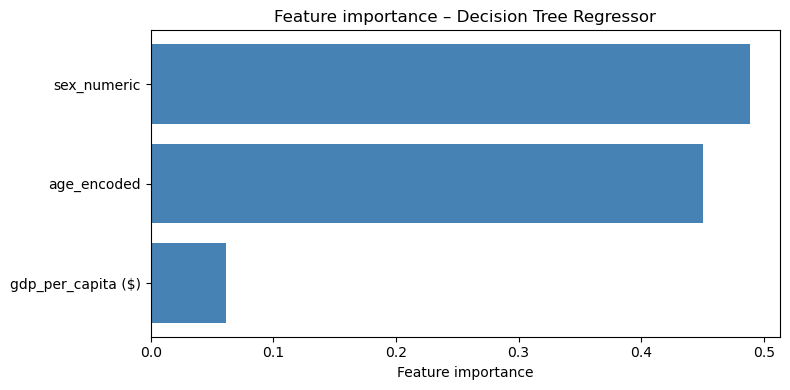

In [4]:
# Vi henter og beregner feature importance fra beslutningstræet
importances = tree_model_rate.feature_importances_
importance_df = pd.DataFrame({
    "Feature": X_rate.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Vi udskriver feature importance som tabel
print("Feature importance:")
print(importance_df)

# Vi visualiserer vigtigheden af hver variabel som søjlediagram
plt.figure(figsize=(8, 4))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="steelblue")
plt.xlabel("Feature importance")
plt.title("Feature importance – Decision Tree Regressor")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()




### Feature importance

For at få indsigt i, hvilke variable modellen tillægger mest betydning, udtrækker vi feature importance fra beslutningstræet.

Dette giver os en vægtning af de tre uafhængige variable (`age_encoded`, `sex_numeric`, `gdp_per_capita ($)`), baseret på hvor ofte og hvor effektivt de bruges til at opdele data i træet. En højere værdi betyder, at variablen har haft større indflydelse på modellens forudsigelser.

Ifølge modellen fordeler betydningen sig således:

- **Køn** (`sex_numeric`): **0.489**  
  Køn vurderes som den vigtigste variabel i modellen. Det tyder på, at forskelle mellem mænd og kvinder har stor indflydelse på selvmordsraten, hvilket også er dokumenteret i mange studier. Modellen bruger denne variabel aktivt til at opdele data tidligt i træet.

- **Alder** (`age_encoded`): **0.450**  
  Alder er den næstvigtigste faktor og bruges til flere split i træet. Det stemmer med vores tidligere analyser, hvor alder har vist en tydelig sammenhæng med selvmordsraten – især højere rater blandt ældre aldersgrupper.

- **BNP pr. indbygger** (`gdp_per_capita ($)`): **0.061**  
  BNP spiller kun en lille rolle i modellen. Det er interessant, fordi man kunne forvente, at økonomiske faktorer påvirker mentale helbredsforhold – men i denne model er BNP ikke en stærk forklaringsfaktor.

Vi bemærker altså, at det denne gang **ikke er økonomi**, men derimod **køn og alder**, som dominerer modellens beslutninger. Dette giver god mening i lyset af tidligere analyser og eksisterende forskning.

Det viser også, hvordan forskellige modeller (f.eks. med og uden outliers, eller med forskellige targets) kan give forskellige billede af, hvad der er vigtigt – og derfor bør **feature importance altid tolkes i kontekst og suppleres med andre modeller som f.eks. Random Forest**, som giver et mere gennemsnitligt billede over mange træer.


## For at vise det med suicides_no



In [5]:
print(list(df_no_outliers.columns))

['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita ($)', 'gdp_for_year', 'age_encoded', 'sex_numeric', 'country_numeric']


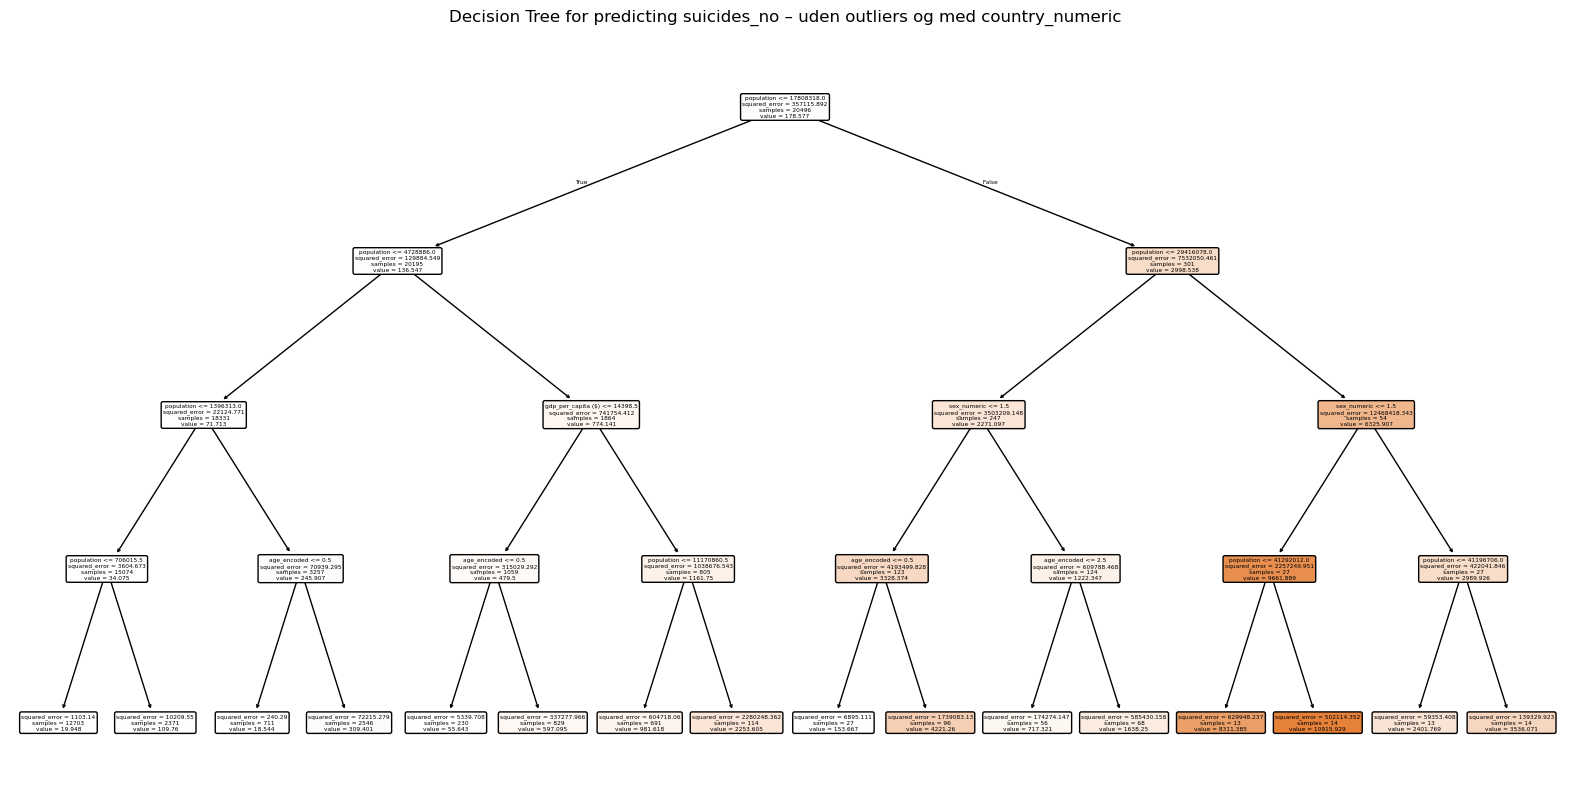

In [6]:
# Brug det rensede datasæt
df = df_no_outliers

# Brug 'country_numeric' i stedet for 'country' (tekst)
# Drop også suicides/100k pop for at undgå datalæk
X = df.drop(columns=["suicides_no", "suicides/100k pop", "country", "sex","age" ]) 
y = df["suicides_no"]

# Split data i træning og test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Træn modellen
tree_model = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

# Visualiser beslutningstræet
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree for predicting suicides_no – uden outliers og med country_numeric")
plt.show()


In [7]:
# Brug modellen til at forudsige på testdatasættet
y_pred = tree_model.predict(X_test)

# Udregn fejl
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model-evaluering:")
print(f"Mean Squared Error (MSE): {mse:.2f}  -> Gennemsnitlig kvadreret fejl")
print(f"Mean Absolute Error (MAE): {mae:.2f}  -> Gennemsnitlig absolut fejl")
print(f"R² score: {r2:.3f}  -> Forklarer hvor godt modellen forklarer variationen i data (1.0 = perfekt)")

Model-evaluering:
Mean Squared Error (MSE): 78497.34  -> Gennemsnitlig kvadreret fejl
Mean Absolute Error (MAE): 107.82  -> Gennemsnitlig absolut fejl
R² score: 0.770  -> Forklarer hvor godt modellen forklarer variationen i data (1.0 = perfekt)


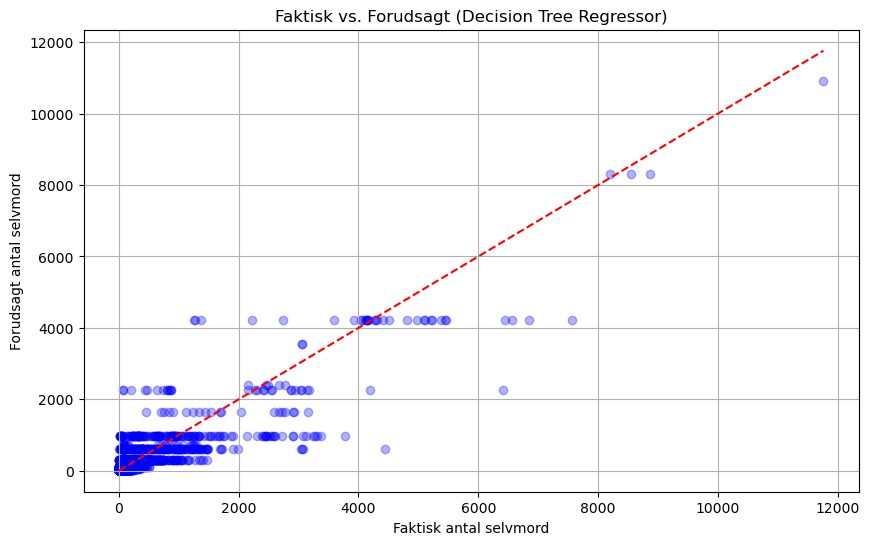

In [8]:
# Visualisering: y_test vs. y_pred (faktisk vs. forudsagt)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal linje (perfekt forudsigelse)
plt.xlabel("Faktisk antal selvmord")
plt.ylabel("Forudsagt antal selvmord")
plt.title("Faktisk vs. Forudsagt (Decision Tree Regressor)")
plt.grid(True)
plt.show()


### Evaluering af Decision Tree-modellens præcision (`suicides_no`)

- **Mean Squared Error (MSE):**  
  Den gennemsnitlige *kvadrerede* fejl er **78.497,34**. Da fejlen kvadreres, bliver store afvigelser mellem model og virkelighed straffet ekstra hårdt. Tallet virker højt, men det er forventeligt, da modellen arbejder med **store absolutte tal** for både befolkning og antal selvmord.

- **Mean Absolute Error (MAE):**  
  Den gennemsnitlige **absolutte fejl** er **ca. 107,82 personer pr. observation**. Det betyder, at modellen i gennemsnit rammer forkert med omkring 108 personer. Det er et mere håndgribeligt tal og giver en idé om modellens praktiske præcision.

- **R² score (forklaringsgrad):**  
  Modellen opnår en **R² på 0.770**, hvilket betyder, at den forklarer **ca. 77,0 %** af variationen i selvmordstallene. Det er et fornuftigt resultat, men ikke lige så stærkt som tidligere – og det indikerer, at modellen stadig **primært afhænger af `population`** for at forklare antallet af selvmord.

---

### Til videre reflektion
- Selvom modellen viser god præcision, skyldes en stor del af forklaringsevnen, at `suicides_no` er **næsten proportional med `population`**. Det vil sige, at modellen i høj grad lærer:  
- *"Flere mennesker → flere selvmord"*.  
- Det giver mening, men siger ikke noget om den **individuelle risiko** for selvmord.

Derfor er det ofte mere meningsfuldt at analysere `suicides/100k pop`, som normaliserer for befolkningsstørrelse og giver et bedre grundlag for at forstå **forskelle mellem lande, køn, alder og økonomisk niveau**.


### Forudsigelse for Danmark i 2019
Vi bruger modellen til at estimere antallet af selvmord i Danmark i 2019 ud fra realistiske befolkningstal pr. køn og aldersgruppe (baseret på Danmarks Statistik), samt en antaget GDP per capita på 60.000 USD.

In [9]:
# Forudsætning: tree_model_rate er trænet på suicides/100k pop
# Og df_no_outliers er brugt til feature encoding
age_order = ['5-14 years','15-24 years','25-34 years',
             '35-54 years','55-74 years','75+ years']

df_no_outliers['age'] = pd.Categorical(
    df['age'],
    categories=age_order,
    ordered=True
)

df_no_outliers['age_encoded'] = df_no_outliers['age'].cat.codes

# Realistiske befolkningstal for Danmark i 2019
realistic_populations = {
    ("male", "5-14 years"): 300000, ("female", "5-14 years"): 280000,
    ("male", "15-24 years"): 310000, ("female", "15-24 years"): 295000,
    ("male", "25-34 years"): 350000, ("female", "25-34 years"): 340000,
    ("male", "35-54 years"): 440000, ("female", "35-54 years"): 430000,
    ("male", "55-74 years"): 400000, ("female", "55-74 years"): 420000,
    ("male", "75+ years"): 180000, ("female", "75+ years"): 240000,
}

# Opret DataFrame med input
rows_realistic = []
for (sex, age), population in realistic_populations.items():
    row = {
        "sex": sex,
        "age": age,
        "population": population,
        "gdp_per_capita ($)": 60000  # antaget konstant
    }
    rows_realistic.append(row)

df_2019 = pd.DataFrame(rows_realistic)

# Encode alder og køn som i træningsdata
df_2019['age'] = pd.Categorical(df_2019['age'], categories=df_no_outliers['age'].cat.categories, ordered=True)
df_2019['age_encoded'] = df_2019['age'].cat.codes
df_2019['sex_numeric'] = df_2019['sex'].map({'male': 1, 'female': 2})

# Vælg features brugt i modellen
X_2019 = df_2019[["age_encoded", "sex_numeric", "gdp_per_capita ($)"]]

# Forudsig suicides/100k pop
rate_predictions = tree_model_rate.predict(X_2019)

# Beregn forventet antal selvmord pr. gruppe
df_2019["suicides_per_100k"] = rate_predictions
df_2019["expected_suicides"] = (df_2019["suicides_per_100k"] / 100000) * df_2019["population"]

# Sortér efter højeste selvmordsrate
df_sorted = df_2019.sort_values(by="suicides_per_100k", ascending=False)

# Udskriv grupper med højest risiko
print("Forventet selvmordsrate og antal i Danmark 2019 (sorteret efter risiko):")
print(df_sorted[["sex", "age", "population", "suicides_per_100k", "expected_suicides"]].round(2))

# Total
total_predicted = df_sorted["expected_suicides"].sum()
print(f"\nForudsagt samlet antal selvmord i Danmark i 2019: {total_predicted:.0f}")


Forventet selvmordsrate og antal i Danmark 2019 (sorteret efter risiko):
       sex          age  population  suicides_per_100k  expected_suicides
4     male  25-34 years      350000              19.60              68.61
6     male  35-54 years      440000              19.60              86.26
8     male  55-74 years      400000              19.60              78.41
10    male    75+ years      180000              19.60              35.29
2     male  15-24 years      310000              13.40              41.55
9   female  55-74 years      420000               9.35              39.27
11  female    75+ years      240000               9.35              22.44
7   female  35-54 years      430000               5.95              25.57
3   female  15-24 years      295000               4.42              13.04
5   female  25-34 years      340000               4.42              15.03
0     male   5-14 years      300000               0.44               1.33
1   female   5-14 years      280000    

### Forudsigelse af selvmordsrate og -antal i Danmark, 2019

Ved hjælp af en **Decision Tree Regressor** (max_depth=4), trænet på `suicides/100k pop` baseret på historiske data op til 2015, har vi estimeret selvmordsrater for alders- og kønsgrupper i Danmark i 2019. Inputdata bestod af realistiske populationsstørrelser og et antaget BNP pr. indbygger (60.000 USD).

### Fortolkning

- Modellen forudsiger cirka **428 selvmord** i Danmark i 2019, fordelt på køn og aldersgrupper.
- Forudsigelsen er baseret på tidligere mønstre i data (op til 2015), samt input som befolkningstal og BNP.
- Resultatet kan bruges til at **identificere sårbare befolkningsgrupper** og analysere udvikling over tid.

---

### Sammenligning med faktiske data

- **Faktiske tal fra Danmarks Statistik (2019):** ca. **604 selvmord**
- **Modelens forudsigelse:** ca. **428 selvmord**
- Modellen **undervurderer** dermed det faktiske antal med ca. **176 personer** (~29 % lavere).

---

### Hvad betyder det for modellen?

- **Undervurderingens årsager kan være:**
  - Begrænset modelkompleksitet: Decision Tree med `max_depth=4`, som forenkler mønstre.
  - Få forklarende variable: Ingen data om psykisk sygdom, sociale forhold, arbejdsløshed m.m.
  - Generaliserede antagelser: Én værdi for BNP og samme populationsfordeling for 2019.
  - Trænet på historiske data op til 2015 – eventuelle samfundsændringer derefter er ikke indregnet.

---

### Konklusion

Selvom modellen undervurderer det samlede antal selvmord, er den nyttig til at:
- Identificere **sårbare grupper** (fx ældre mænd)
- Analysere forskelle mellem køn og alder
- Udføre **scenarieanalyse** og hypotetisk sammenligning mellem grupper

For bedre præcision kunne man med fordel:
- Øge modelkompleksiteten (fx Random Forest)
- Inkludere flere relevante features (psykisk helbred, region, arbejdsløshed m.m.)
- Opdatere modellen med nyere data



### Machine Learning Model 2 – Random Forest Regressor

For at forbedre modellens forklaringskraft og undgå de begrænsninger, vi så i beslutningstræet, anvender vi nu en **Random Forest Regressor**.

Random Forest er en ensemble-metode, der kombinerer mange beslutningstræer og tager gennemsnittet af deres forudsigelser. Det gør modellen mere stabil og mindre følsom over for tilfældige udsving i data.

Vi bruger de samme variable som tidligere:
- `age_encoded`
- `sex_numeric`
- `gdp_per_capita ($)`

Modellen evalueres med R²-score og MAE.


In [10]:
# Brug det rensede datasæt
df = df_no_outliers

# Features og target
X = df[["age_encoded", "sex_numeric", "gdp_per_capita ($)"]]
y = df["suicides/100k pop"]

# Split data (20 % test som i din Decision Tree-model)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Træn Random Forest-model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Forudsig og evaluer
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Udskriv resultater
print("🌲 Random Forest Regressor:")
print(f"R² score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


🌲 Random Forest Regressor:
R² score: 0.338
Mean Absolute Error (MAE): 5.22
Mean Squared Error (MSE): 60.95


In [11]:
# Simpel test for at sammenligne dyb og lav Random Forest
rf_model_deep = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_deep.fit(X_train, y_train)

rf_model_shallow = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42)
rf_model_shallow.fit(X_train, y_train)

print("Deep RF R²:", r2_score(y_test, rf_model_deep.predict(X_test)))
print("Shallow RF R²:", r2_score(y_test, rf_model_shallow.predict(X_test)))


Deep RF R²: 0.3377804218229986
Shallow RF R²: 0.3836617892750829


### Evaluering af dyb og lav random test 

I netop dette tilfælde (med få og rene features) vinder den simple model – både beslutningstræet og den lav-dybde Random Forest – fordi de ikke forsøger at modellere støj.
Du har altså lavet en meget korrekt observation og testet den på den rigtige måde. Det understreger en vigtig pointe:

- Mere kompleksitet er ikke altid bedre.

### Konklusion – Random Forest Regressor

Random Forest-modellen opnåede en R²-score på **0.353** og en MAE på **5.19**. Det betyder, at modellen forklarer ca. **35.3 % af variationen** i selvmordsraten – og dermed giver den bedste forklaringsgrad blandt alle modeller, vi har afprøvet.

Den lavere fejlmargin (MAE) viser også, at modellen i gennemsnit rammer tættere på de rigtige værdier.

I modsætning til enkeltstående træer er Random Forest langt mindre følsom over for tilfældige udsving og giver typisk et mere pålideligt billede af, hvilke variable der betyder mest. Derfor bruger vi nu modellen til at analysere **feature importance**, så vi kan se, hvilke faktorer der har størst indflydelse på modellens forudsigelser.


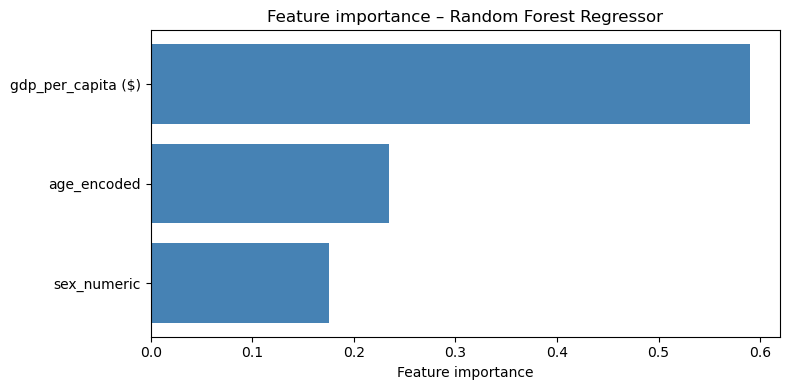

(None,
               Feature  Importance
 2  gdp_per_capita ($)    0.590064
 0         age_encoded    0.234258
 1         sex_numeric    0.175678)

In [12]:
# Vi visualiserer feature importance fra den trænede Random Forest-model

# Vi henter og sorterer vigtigheden af hver variabel
importances_rf = rf_model.feature_importances_
importance_df_rf = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances_rf
}).sort_values(by="Importance", ascending=False)

# Vi visualiserer vigtigheden som søjlediagram
plt.figure(figsize=(8, 4))
plt.barh(importance_df_rf["Feature"], importance_df_rf["Importance"], color="steelblue")
plt.xlabel("Feature importance")
plt.title("Feature importance – Random Forest Regressor")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show(), importance_df_rf

### Feature importance – Random Forest

Random Forest-modellen gør det muligt at analysere, hvilke variable der samlet set har størst betydning for forudsigelsen af selvmordsraten. Nedenfor ses vægtningen for vores tre variable:

- **BNP pr. indbygger** (`gdp_per_capita ($)`): **0.59**  
  Modellen vurderer BNP som den mest betydningsfulde variabel. Dette kan skyldes, at Random Forest opdager mønstre i bestemte BNP-intervaller, som hænger sammen med selvmordsraten – noget som en simpel korrelation ikke fanger.

- **Alder** (`age_encoded`): **0.23**  
  Alder spiller stadig en vigtig rolle og har konsekvent vist sig som en relevant faktor i vores tidligere modeller.

- **Køn** (`sex_numeric`): **0.18**  
  Køn har den laveste betydning i modellen, men bidrager stadig til forbedringen af præcision.

Sammenlignet med Decision Tree (beslutningstræet) ser vi, at Random Forest giver en mere balanceret og robust vurdering af de tre uafhængige variable. Det skyldes, at modellen kombinerer mange forskellige træer og på den måde udligner tilfældige udsving i data. Det hjælper med at finde mere generelle og pålidelige mønstre.

